In [ ]:
### Connecting To Google Drive ###
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
### Path Of The Dataset ###
pathTrain='/content/gdrive/MyDrive/CV_Final_Project/BU3DFE-P2/Train/'

In [ ]:
### Load the degree predictor model ###
import cv2
import tensorflow as tf
degree_predictor =tf.keras.models.load_model('/content/gdrive/MyDrive/degree4.h5')

### Load The Guid Maps ###
guid_map_00 = cv2.imread('/content/gdrive/MyDrive/GuidMaps/Guid_map_00.png')
guid_map_30 = cv2.imread('/content/gdrive/MyDrive/GuidMaps/Guid_map_30.png')
guid_map_45 = cv2.imread('/content/gdrive/MyDrive/GuidMaps/Guid_map_45.png')
guid_map_60 = cv2.imread('/content/gdrive/MyDrive/GuidMaps/Guid_map_60.png')
guid_map_90 = cv2.imread('/content/gdrive/MyDrive/GuidMaps/Guid_map_90.png')


guid_map_00 =  cv2.cvtColor(guid_map_00, cv2.COLOR_BGR2GRAY)
guid_map_30 =  cv2.cvtColor(guid_map_30, cv2.COLOR_BGR2GRAY)
guid_map_45 =  cv2.cvtColor(guid_map_45, cv2.COLOR_BGR2GRAY)
guid_map_60 =  cv2.cvtColor(guid_map_60, cv2.COLOR_BGR2GRAY)
guid_map_90 =  cv2.cvtColor(guid_map_90, cv2.COLOR_BGR2GRAY)

In [ ]:
### Define Parameters ###
import os
all_images  = []
lable     = []
subjects    = os.listdir(pathTrain)
num_classes = len(subjects)
print(subjects)
print(num_classes)
degree_dict={0:'00',1:'30',2:'45',3:'60',4:'90'}

['0', '1', '2', '3', '4', '5', '6']
7


In [ ]:
### Load all images ###
for number1 in range(0,num_classes):
    print(number1)
    path = (pathTrain + subjects[number1] + '/')
    files = os.listdir(path)
    numberOfsamples = len(files)
    for number2 in range(0, numberOfsamples):
        pathImg = path + files[number2]
        img = cv2.imread(pathImg)
        img = cv2.resize(img, (200,220), interpolation = cv2.INTER_AREA)
        img =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        all_images.append(img)
        lable.append(int(number1))

    print(numberOfsamples)

0
500
1
500
2
500
3
500
4
500
5
500
6
500


In [ ]:
### Split Train And Test Data's ###
import numpy as np
import random
from sklearn.model_selection import train_test_split
random.seed(1)
X_train,X_test,Y_train,Y_test = train_test_split(all_images,lable, test_size=0.2 ,shuffle=True, random_state=True)

(2800, 220, 200, 3)
4
2800


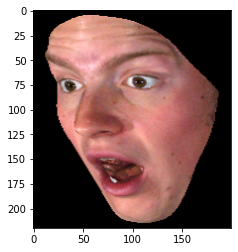

In [ ]:
import numpy as np
X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype=np.uint16)
print(X_train.shape)
import matplotlib.pyplot as plt
plt.imshow(X_train[100].astype('uint16'))
print(Y_train[100])
print(len(Y_train))

(700, 220, 200, 3)
0
700


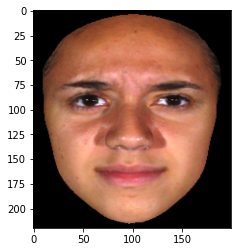

In [ ]:
X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype=np.uint16)
print(X_test.shape)
import matplotlib.pyplot as plt
plt.imshow(X_test[600])
print(Y_test[600])
print(len(Y_test))

In [ ]:
### Multiplying The Train Iamges To Guid Images To Extract The Region Of Intrest's ###
new_X_train = []

for i in range(0,len(X_train)):
  imgtest=np.zeros((1,220,200,3))
  imgtest[0,:,:,:] = X_train[i,:,:,:]
  imgtest = imgtest.astype('float32')
  imgtest /= 255.0
  prediction=degree_predictor.predict(imgtest)
  pred_class=np.argmax(prediction,axis=1)
  pred_class=degree_dict[pred_class[0]]
  if pred_class == '00':
    guid_map = guid_map_00
  elif pred_class == '30':
    guid_map = guid_map_30
  elif pred_class == '45':
    guid_map = guid_map_45
  elif pred_class == '60':
    guid_map = guid_map_60
  elif pred_class == '90':
    guid_map = guid_map_90
  else:
    print('Something Went Wrong !!!')

  img =  cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)
  img = img * guid_map
  img = img[15:220-15, 15:200-15]
  img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
  new_X_train.append(img)

In [ ]:
### Multiplying The test Iamges To Guid Images To Extract The Region Of Intrest's ###
new_X_test = []

for i in range(0,len(X_test)):
  imgtest=np.zeros((1,220,200,3))
  imgtest[0,:,:,:] = X_test[i,:,:,:]
  imgtest = imgtest.astype('float32')
  imgtest /= 255.0
  prediction=degree_predictor.predict(imgtest)
  pred_class=np.argmax(prediction,axis=1)
  pred_class=degree_dict[pred_class[0]]
  if pred_class == '00':
    guid_map = guid_map_00
  elif pred_class == '30':
    guid_map = guid_map_30
  elif pred_class == '45':
    guid_map = guid_map_45
  elif pred_class == '60':
    guid_map = guid_map_60
  elif pred_class == '90':
    guid_map = guid_map_90
  else:
    print('Something Went Wrong !!!')

  img =  cv2.cvtColor(X_test[i], cv2.COLOR_BGR2GRAY)
  img = img * guid_map
  img = img[15:220-15, 15:200-15]
  img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
  new_X_test.append(img)

In [ ]:
### LBP Feature Extractor ###
import cv2
import numpy as np
from matplotlib import pyplot as plt


def get_pixel(img, center, x, y):

	new_value = 0

	try:
		# If local neighbourhood pixel
		# value is greater than or equal
		# to center pixel values then
		# set it to 1
		if img[x][y] >= center:
			new_value = 1

	except:
		# Exception is required when
		# neighbourhood value of a center
		# pixel value is null i.e. values
		# present at boundaries.
		pass

	return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):

	center = img[x][y]

	val_ar = []

	# top_left
	val_ar.append(get_pixel(img, center, x-1, y-1))

	# top
	val_ar.append(get_pixel(img, center, x-1, y))

	# top_right
	val_ar.append(get_pixel(img, center, x-1, y + 1))

	# right
	val_ar.append(get_pixel(img, center, x, y + 1))

	# bottom_right
	val_ar.append(get_pixel(img, center, x + 1, y + 1))

	# bottom
	val_ar.append(get_pixel(img, center, x + 1, y))

	# bottom_left
	val_ar.append(get_pixel(img, center, x + 1, y-1))

	# left
	val_ar.append(get_pixel(img, center, x, y-1))

	# Now, we need to convert binary
	# values to decimal
	power_val = [1, 2, 4, 8, 16, 32, 64, 128]

	val = 0

	for i in range(len(val_ar)):
		val += val_ar[i] * power_val[i]

	return val

In [ ]:
### Extracting LBP Features ###
all_images_lbp_train = []

for i in range(0,len(new_X_train)):
  img_gray = new_X_train[i]
  img_lbp = np.zeros((50,50), np.uint8)
  for j in range(0, 50):
    for k in range(0, 50):
      img_lbp[j, k] = lbp_calculated_pixel(img_gray, j, k)

  all_images_lbp_train.append(img_lbp)
new_X_train = []

In [ ]:
### Extracting LBP Features ###
all_images_lbp_test = []

for i in range(0,len(new_X_test)):
  img_gray = new_X_test[i]
  img_lbp = np.zeros((50,50), np.uint8)
  for j in range(0, 50):
    for k in range(0, 50):
      img_lbp[j, k] = lbp_calculated_pixel(img_gray, j, k)

  all_images_lbp_test.append(img_lbp)
new_X_test = []

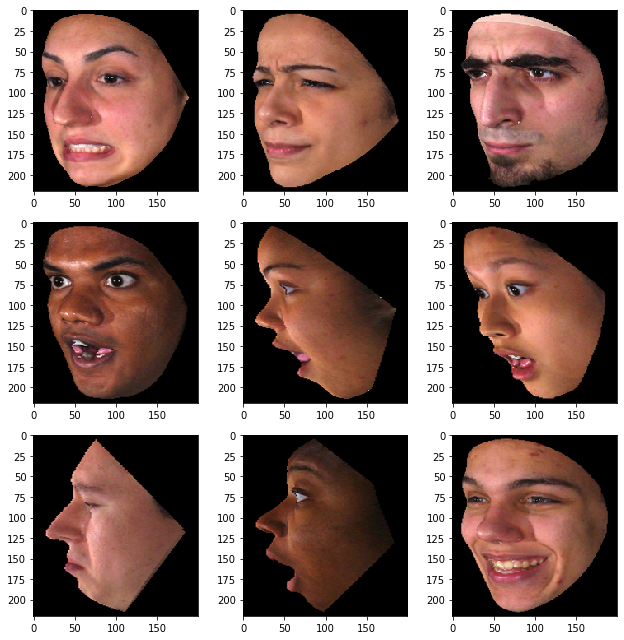

In [ ]:
### Plotting Some Of The Pictures ###
import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    m=Y_train[num]
plt.tight_layout()

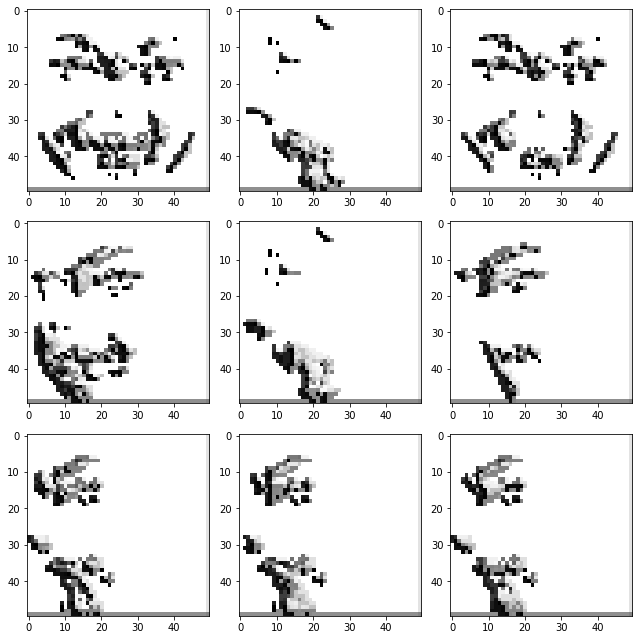

In [ ]:
### Plotting Some Of The Pictures ###
import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(all_images_lbp_train))
    plt.imshow(all_images_lbp_train[num], cmap='gray', interpolation='none')
    m=Y_train[num]
plt.tight_layout()

In [ ]:
### Deleting Zeros From The Pictures ###
new_all_images_lbp_train_without_zeros = all_images_lbp_train
for i in range(len(all_images_lbp_train)):
  tmp = all_images_lbp_train[i]
  tmp = tmp.reshape(2500,-1)
  tmp = np.delete(tmp, np.where(tmp == 255))
  while tmp.shape[0] <= 783:
    tmp = np.append(tmp, 0)
  new_all_images_lbp_train_without_zeros[i] = tmp
  print(i)

In [ ]:
### Deleting Zeros From The Pictures ###
new_all_images_lbp_test_without_zeros = all_images_lbp_test
for i in range(len(all_images_lbp_test)):
  tmp = all_images_lbp_test[i]
  tmp = tmp.reshape(2500,-1)
  tmp = np.delete(tmp, np.where(tmp == 255))
  while tmp.shape[0] <= 783:
    tmp = np.append(tmp, 0)
  new_all_images_lbp_test_without_zeros[i] = tmp
  print(i)

In [ ]:
all_images_lbp_train = []

for i in range(len(new_all_images_lbp_train_without_zeros)):
  all_images_lbp_train.append(new_all_images_lbp_train_without_zeros[i][:].reshape(28,28))

new_all_images_lbp_train_without_zeros = []

In [ ]:
all_images_lbp_test = []

for i in range(len(new_all_images_lbp_test_without_zeros)):
  all_images_lbp_test.append(new_all_images_lbp_test_without_zeros[i][:].reshape(28,28))

new_all_images_lbp_test_without_zeros = []

In [ ]:
all_images_lbp_train = np.array(all_images_lbp_train)

print(all_images_lbp_train.shape)
import matplotlib.pyplot as plt
plt.imshow(all_images_lbp_train[600])
print(Y_train[600])
print(len(Y_train))

In [ ]:
all_images_lbp_test = np.array(all_images_lbp_test)

print(all_images_lbp_test.shape)
import matplotlib.pyplot as plt
plt.imshow(all_images_lbp_test[600])
print(Y_test[600])
print(len(Y_test))

In [ ]:
### Normalization ###
import numpy as np
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Y_train = to_categorical(Y_train,num_classes)
Y_test  = to_categorical(Y_test,num_classes)

X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

all_images_lbp_train = all_images_lbp_train.astype('float32')
all_images_lbp_test  = all_images_lbp_test.astype('float32')

X_train   /= 255.0
X_test    /= 255.0

all_images_lbp_train /= 255.0
all_images_lbp_test  /= 255.0

In [ ]:
### Channel Attention Module ###
import tensorflow as tf
class ChannelAttention(tf.keras.layers.Layer):
      def __init__(self, filters, ratio):
        super(ChannelAttention, self).__init__()
        self.filters = filters
        self.ratio = ratio

        def build(self, input_shape):
            self.shared_layer_one = tf.keras.layers.Dense(self.filters//self.ratio,
                             activation='relu', kernel_initializer='he_normal',
                              use_bias=True,
                              bias_initializer='zeros')
            self.shared_layer_two = tf.keras.layers.Dense(self.filters,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

        def call(self, inputs):
            # AvgPool
            avg_pool = tf.keras.layers.GlobalAveragePooling2D()(inputs)


            avg_pool = self.shared_layer_one(avg_pool)
            avg_pool = self.shared_layer_two(avg_pool)

            # MaxPool
            max_pool = tf.keras.layers.GlobalMaxPooling2D()(inputs)
            max_pool = tf.keras.layers.Reshape((1,1,filters))(max_pool)

            max_pool = shared_layer_one(max_pool)
            max_pool = shared_layer_two(max_pool)


            attention = tf.keras.layers.Add()([avg_pool,max_pool])
            attention = tf.keras.layers.Activation('sigmoid')(attention)

            return tf.keras.layers.Multiply()([inputs, attention])

In [ ]:
### Spatial Attention Module ###
class SpatialAttention(tf.keras.layers.Layer):
      def __init__(self, kernel_size):
        super(SpatialAttention, self).__init__()
        self.kernel_size = kernel_size

        def build(self, input_shape):
            self.conv2d = tf.keras.layers.Conv2D(filters = 1,
                    kernel_size=self.kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)

        def call(self, inputs):

            # AvgPool
            avg_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(inputs)

            # MaxPool
            max_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(inputs)

            attention = tf.keras.layers.Concatenate(axis=3)([avg_pool, max_pool])

            attention = self.conv2d(attention)


            return tf.keras.layers.multiply([inputs, attention])

In [ ]:
import numpy
import tensorflow as tf
import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing import image
import time
import numpy as np
from keras import regularizers
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import layers, models
from keras.layers import Dense
import tensorflow as tf
import time
from keras import regularizers
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import layers, models
from keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
# ResNet_18 Base
def resnet_18 (x):
  def add_common_layers (y, name):
    y = layers.BatchNormalization (name = name + '_bn')(y)
    y = layers.Activation ('relu', name = name + '_relu')(y)
    return y
  def add (y, name):
    y = layers.add (y, name = name + '_add')
    return y
  def conv (y, channel_size, kernel_size, stride, name):
    global counter
    if counter % 2 == 0:
      y = add_common_layers (y, name)
    y = layers.Conv2D (channel_size, (kernel_size, kernel_size), strides = stride, padding = 'same', name = name + '_conv_' + str (counter), kernel_regularizer=regularizers.l2(0.0005))(y)
    counter += 1
    return (y)
  def residual (y, channel_size, kernel_size, name, do_max_pool = False):
    global counter
    if do_max_pool == False:
      residue = conv (y, channel_size, kernel_size, 1, name + '_residue_1')
    else:
      residue = conv (y, channel_size, kernel_size, 2, name + '_residue_1')
      y = layers.Conv2D (channel_size, (1, 1), strides = 2, name = name + '_original_reshaped')(y)
    residue = conv (residue, channel_size, kernel_size, 1, name + '_residue_2')
    y = add ([y, residue], name + '_1')
    y = add_common_layers (y, name + '_1')
    residue = conv (y, channel_size, kernel_size, 1, name + '_residue_3')
    residue = conv (residue, channel_size, kernel_size, 1, name + '_residue_4')
    y = add ([y, residue], name + '_2')
    if counter != 19:
      y = add_common_layers (y, name + '_2')
    return y
  x = layers.Conv2D (64, (3, 3), strides = 1, padding='same', name='first_layer_112_1')(x)
  x = add_common_layers (x, 'preparation')
  x = residual (x, 64, 3, 'B1')
  x = residual (x, 128, 3, 'B2', True)
  x = residual (x, 256, 3, 'B3', True)
  x = residual (x, 512, 3, 'B4', True)
  maxpool = layers.MaxPooling2D((4, 4))(x)
  avgPool = layers.AveragePooling2D ((4, 4))(x)
  x = layers.concatenate ([maxpool, avgPool])
  x = layers.Conv2D (10, 1, name = 'linear')(x)
  x = layers.Flatten ()(x)

  x = Dense(128, activation='relu')(x)
  x = Dropout(0.15)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.15)(x)
  x = Dense(7, activation='softmax')(x)
  return x

#define global parameters
img_width =180
img_height =180
img_channels = 3
counter = 3
image_tensor = layers.Input(shape=(img_height, img_width, img_channels))
network_output = resnet_18(image_tensor)
model = models.Model(inputs=[image_tensor], outputs=[network_output])

In [ ]:
# ResNet_18 with Attention

def resnet_18 (x):
  def add_common_layers (y, name):
    y = layers.BatchNormalization (name = name + '_bn')(y)
    y = layers.Activation ('relu', name = name + '_relu')(y)
    return y
  def add (y, name):
    y = layers.add (y, name = name + '_add')
    return y
  def conv (y, channel_size, kernel_size, stride, name):
    global counter
    if counter % 2 == 0:
      y = add_common_layers (y, name)
    y = layers.Conv2D (channel_size, (kernel_size, kernel_size), strides = stride, padding = 'same', name = name + '_conv_' + str (counter), kernel_regularizer=regularizers.l2(0.0005))(y)
    counter += 1
    return (y)
  def residual (y, channel_size, kernel_size, name, do_max_pool = False):
    global counter
    if do_max_pool == False:
      residue = conv (y, channel_size, kernel_size, 1, name + '_residue_1')
    else:
      residue = conv (y, channel_size, kernel_size, 2, name + '_residue_1')
      y = layers.Conv2D (channel_size, (1, 1), strides = 2, name = name + '_original_reshaped')(y)
    residue = conv (residue, channel_size, kernel_size, 1, name + '_residue_2')
    y = add ([y, residue], name + '_1')
    y = add_common_layers (y, name + '_1')
    residue = conv (y, channel_size, kernel_size, 1, name + '_residue_3')
    residue = conv (residue, channel_size, kernel_size, 1, name + '_residue_4')
    y = add ([y, residue], name + '_2')
    if counter != 19:
      y = add_common_layers (y, name + '_2')
    return y
  x = layers.Conv2D (64, (3, 3), strides = 1, padding='same', name='first_layer_112_1')(x)

  x = ChannelAttention(32, 8)(x)
  x = SpatialAttention(7)(x)

  x = add_common_layers (x, 'preparation')
  x = residual (x, 64, 3, 'B1')

  x = residual (x, 128, 3, 'B2', True)

  x = residual (x, 256, 3, 'B3', True)

  x = residual (x, 512, 3, 'B4', True)

  x = ChannelAttention(32, 8)(x)
  x = SpatialAttention(7)(x)

  maxpool = layers.MaxPooling2D((4, 4))(x)
  avgPool = layers.AveragePooling2D ((4, 4))(x)
  x = layers.concatenate ([maxpool, avgPool])

  x = ChannelAttention(32, 8)(x)
  x = SpatialAttention(7)(x)

  x = layers.Conv2D (10, 1, name = 'linear')(x)
  x = layers.Flatten ()(x)

  x = Dense(128, activation='relu')(x)
  x = Dropout(0.15)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.15)(x)
  x = Dense(7, activation='softmax')(x)
  return x

#define global parameters
img_width =180
img_height =180
img_channels = 3
counter = 3
image_tensor = layers.Input(shape=(img_height, img_width, img_channels))
network_output = resnet_18(image_tensor)
model = models.Model(inputs=[image_tensor], outputs=[network_output])

In [ ]:
### Two Path ResNet18 with Attention ###
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
def resnet_18 (x):
  def add_common_layers (y, name):
    y = layers.BatchNormalization (name = name + '_bn')(y)
    y = layers.Activation ('relu', name = name + '_relu')(y)
    return y
  def add (y, name):
    y = layers.add (y, name = name + '_add')
    return y
  def conv (y, channel_size, kernel_size, stride, name):
    global counter
    if counter % 2 == 0:
      y = add_common_layers (y, name)
    y = layers.Conv2D (channel_size, (kernel_size, kernel_size), strides = stride, padding = 'same', name = name + '_conv_' + str (counter), kernel_regularizer=regularizers.l2(0.0005))(y)
    counter += 1
    return (y)
  def residual (y, channel_size, kernel_size, name, do_max_pool = False):
    global counter
    if do_max_pool == False:
      residue = conv (y, channel_size, kernel_size, 1, name + '_residue_1')
    else:
      residue = conv (y, channel_size, kernel_size, 2, name + '_residue_1')
      y = layers.Conv2D (channel_size, (1, 1), strides = 2, name = name + '_original_reshaped')(y)
    residue = conv (residue, channel_size, kernel_size, 1, name + '_residue_2')
    y = add ([y, residue], name + '_1')
    y = add_common_layers (y, name + '_1')
    residue = conv (y, channel_size, kernel_size, 1, name + '_residue_3')
    residue = conv (residue, channel_size, kernel_size, 1, name + '_residue_4')
    y = add ([y, residue], name + '_2')
    if counter != 19:
      y = add_common_layers (y, name + '_2')
    return y
  x = layers.Conv2D (64, (3, 3), strides = 1, padding='same', name='first_layer_112_1')(x)

  x = ChannelAttention(32, 8)(x)
  x = SpatialAttention(7)(x)

  x = add_common_layers (x, 'preparation')
  x = residual (x, 64, 3, 'B1')

  x = residual (x, 128, 3, 'B2', True)

  x = residual (x, 256, 3, 'B3', True)

  x = residual (x, 512, 3, 'B4', True)

  x = ChannelAttention(32, 8)(x)
  x = SpatialAttention(7)(x)

  maxpool = layers.MaxPooling2D((4, 4))(x)
  avgPool = layers.AveragePooling2D ((4, 4))(x)
  x = layers.concatenate ([maxpool, avgPool])

  x = ChannelAttention(32, 8)(x)
  x = SpatialAttention(7)(x)

  x = layers.Conv2D (10, 1, name = 'linear')(x)
  x = layers.Flatten ()(x)

  return x

#define global parameters
img_width =200
img_height =220
img_channels = 3
counter = 3
input = layers.Input(shape=(img_height, img_width, img_channels))
x = resnet_18(input)

## Second Path
input2 = layers.Input(shape=(28,28,1))
x2 = Flatten()(input2)

merge = concatenate([x,x2])
output = Dense(7, activation = 'softmax')(merge)
model = Model([input,input2], output)

In [ ]:
# DensNet_121 Base

import tensorflow as tf
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout
input = tf.keras.Input(shape=(220, 220, 3))

model=tf.keras.applications.DenseNet121(weights='imagenet',include_top = False,input_tensor = input)
x=model.output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dense(128,activation='relu')(x)
x= Dropout(0.5)(x)
x= Dense(64,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
output = tf.keras.layers.Dense(7, activation='softmax')(x)

# bind all
model = tf.keras.Model(model.input, output)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# DensNet_121 with Attention

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K

# Creating Densenet121
def densenet(input_shape, n_classes, filters = 32):

    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):

        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x

    def dense_block(x, repetition):

        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x

    def transition_layer(x):

        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x

    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)

    x = ChannelAttention(8, 8)(x)
    x = SpatialAttention(7)(x)

    for repetition in [6,12,24,16]:

        d = dense_block(x, repetition)
        x = transition_layer(d)
        x = ChannelAttention(8, 8)(x)
        x = SpatialAttention(7)(x)
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)

    model = Model(input, output)
    return model
input_shape = 224, 224, 3
n_classes = 7
model = densenet(input_shape,n_classes)
model.summary()

In [ ]:
### Two Path DensNet_121 with Attention ###
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K

# Creating Densenet121
def densenet(input_shape, n_classes, filters = 32):

    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):

        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
        return x

    def dense_block(x, repetition):

        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x

    def transition_layer(x):

        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x

    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)

    x = ChannelAttention(8, 8)(x)
    x = SpatialAttention(7)(x)

    for repetition in [6,12,24,16]:

        d = dense_block(x, repetition)
        x = transition_layer(d)
        x = ChannelAttention(8, 8)(x)
        x = SpatialAttention(7)(x)
    x = GlobalAveragePooling2D()(d)

    ## Second Path
    input2 = Input ((50,50,1))
    input2 = Flatten()(input2)

    merge = concatenate([x,input2])
    output = Dense(n_classes, activation = 'softmax')(merge)
    model = Model([input,input2], output)

    return model
input_shape = 220, 200, 3
n_classes = 7
model = densenet(input_shape,n_classes)
model.summary()

In [ ]:
model.summary( )

In [ ]:
### Compiling The Model ###
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.001,
    verbose=2
)

In [ ]:
### Saving The Results In CSV File ###
from tensorflow.keras.callbacks import CSVLogger
csv_logger = CSVLogger('resNet18_twoPath.csv')

In [ ]:
### Fitting The Model ####
ResNet18_model=model.fit([X_train,all_images_lbp_train], Y_train, validation_data=([X_test, all_images_lbp_test], Y_test) ,batch_size=32, epochs = 100, callbacks=[csv_logger])
Network_history = ResNet18_model
history=Network_history.history

In [ ]:
loss,accuracy=model.evaluate([X_test, all_images_lbp_test],Y_test)
print('Accuracy = ',accuracy)
print('loss = ',loss)

In [ ]:
from sklearn.metrics import accuracy_score
test_true = np.argmax(Y_test, axis=1)
test_pred = np.argmax(model.predict([X_test, all_images_lbp_test]), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

In [ ]:
history = ResNet18_model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot normalized confusion matrix
emotion_labels = ["AN", "HA", "NE", "FE", "SU", "SA", "DI"]
plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:

import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()